In [795]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


pd.set_option('display.max_info_columns', 500)
pd.options.display.width = 1000

In [796]:
# Read the dataset
df = pd.read_csv('day.csv')

# Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  weathersit      

<Figure size 1500x1000 with 0 Axes>

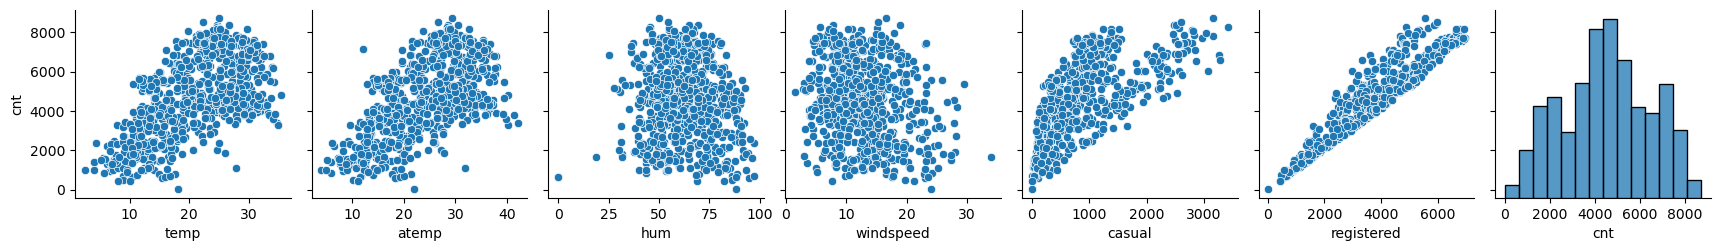

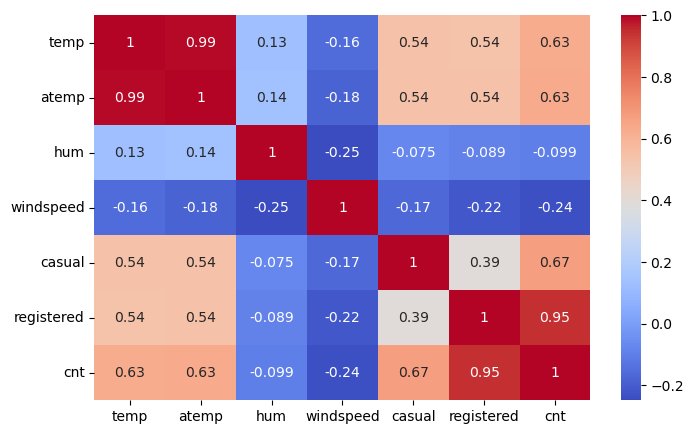

In [797]:
#quantitative columns
quant_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(15,10))
sns.pairplot(x_vars = quant_cols, y_vars = ['cnt'], data = df)
plt.show()

# Correlation matrix
plt.figure(figsize=(8,5))
corr = df[quant_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Linear relation of quantitative variables with target variable

- 'temp' and 'atemp' clearly seems to have a linear relation with target variable
- 'temp' and 'atemp' have high correlation, which means one of them might need to be removed while feature selection

# Conversion of categorical variables as type category

This conversion offers several benefits:
- Memory Efficiency: For columns with a limited number of unique values (categories), storing them as a Categorical type can significantly reduce memory usage compared to storing them as object (string) types. This is because Pandas stores an efficient integer-based representation internally, along with a list of the unique categories.
- Performance Optimization: Operations like grouping, sorting, and filtering can be faster on Categorical data types, especially when dealing with large datasets, due to the underlying integer representation.
- Semantic Clarity: Explicitly defining a column as Categorical makes the data's nature clear, indicating that the values represent distinct categories rather than arbitrary strings or numerical values with a continuous meaning.
Custom Ordering: Categorical data allows for defining a custom sort order for the categories, which is useful for presenting data in a logical, non-alphabetical sequence (e.g., "Small", "Medium", "Large").

In [798]:

categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_features:
    df[col] = df[col].astype('category')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    object  
 2   season      730 non-null    category
 3   yr          730 non-null    category
 4   mnth        730 non-null    category
 5   holiday     730 non-null    category
 6   weekday     730 non-null    category
 7   workingday  730 non-null    category
 8   weathersit  730 non-null    category
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  hum         730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 57.9+ KB
None


# Visualization of Categorical features

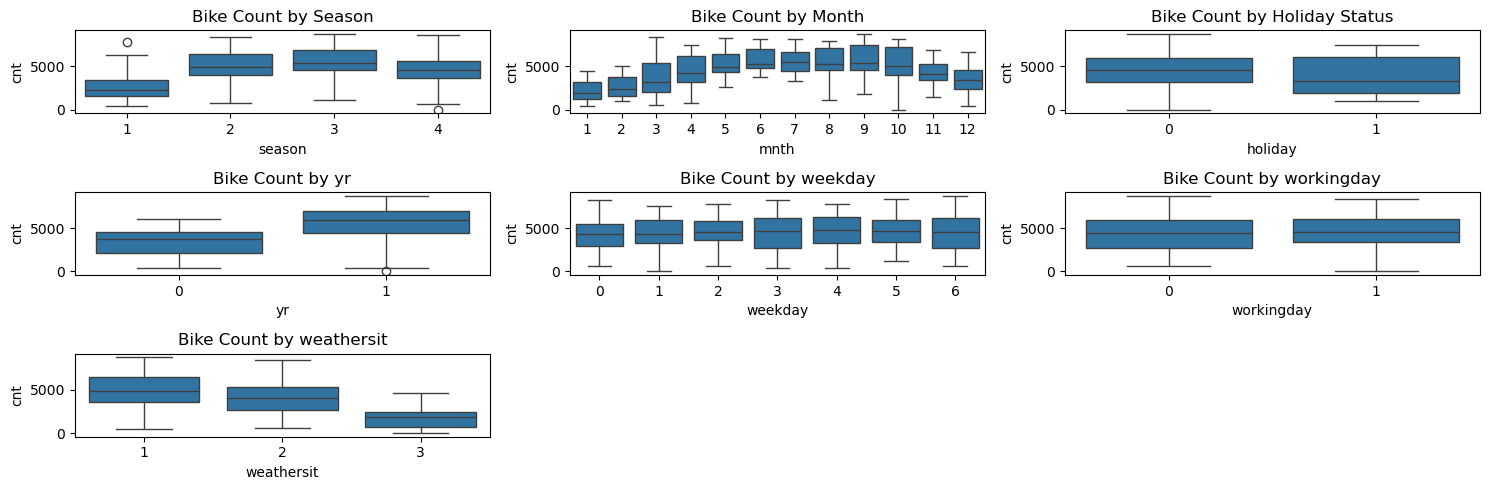

In [799]:
TARGET = 'cnt'

plt.figure(figsize=(15, 5))

# Plotting 'season' vs 'cnt'
plt.subplot(3, 3, 1)
sns.boxplot(x='season', y=TARGET, data=df)
plt.title('Bike Count by Season')

# Plotting 'month' vs 'cnt'
plt.subplot(3, 3, 2)
sns.boxplot(x='mnth', y=TARGET, data=df)
plt.title('Bike Count by Month')

# Plotting 'is_holiday' vs 'cnt'
plt.subplot(3, 3, 3)
sns.boxplot(x='holiday', y=TARGET, data=df)
plt.title('Bike Count by Holiday Status')

# Plotting 'yr' vs 'cnt'
plt.subplot(3, 3, 4)
sns.boxplot(x='yr', y=TARGET, data=df)
plt.title('Bike Count by yr')

# Plotting 'weekday' vs 'cnt'
plt.subplot(3, 3, 5)
sns.boxplot(x='weekday', y=TARGET, data=df)
plt.title('Bike Count by weekday')

# Plotting 'workingday' vs 'cnt'
plt.subplot(3, 3, 6)
sns.boxplot(x='workingday', y=TARGET, data=df)
plt.title('Bike Count by workingday')

# Plotting 'weathersit' vs 'cnt'
plt.subplot(3, 3, 7)
sns.boxplot(x='weathersit', y=TARGET, data=df)
plt.title('Bike Count by weathersit')

plt.tight_layout()
plt.show()

# Observations

- High demands observed in
    - season 2,3,4 (summer, fall and winter) 
        - This could be due to spring break in US school/colleges
    - months 5 to 10
    - When it is not a holiday
    - weather situation 1,2 (i.e. when weather is clear or lightly misty/cloudy)


# Data Preparation
- Generate Dummy Variables
- Train/Test split
- Rescale features

In [800]:
# Create dummies for categorical variables and combine with quantitative features
df_dummies = pd.get_dummies(df, columns=categorical_features, drop_first=True, dtype=int)
# print(df_dummies.info())
# print(df_dummies.head())

df_dummies.drop(columns=['instant', 'dteday'], inplace=True)



In [801]:
# Train Test Split
np.random.seed(11)
df_train, df_test = train_test_split(df_dummies, train_size = 0.7, test_size = 0.3, random_state = 100)

In [802]:
# Rescaling features
# since target variable 'cnt' has high values, we will rescale the features to bring them to a similar scale
scaler = MinMaxScaler()

quantitative_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
toScale = quantitative_features + [TARGET]

df_train[toScale] = scaler.fit_transform(df_train[toScale])

print(df_train.head())
print(df_train.describe())

         temp     atemp       hum  windspeed    casual  registered       cnt  season_2  season_3  season_4  ...  holiday_1  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  workingday_1  weathersit_2  weathersit_3
653  0.509887  0.501133  0.575354   0.300794  0.280402    0.951776  0.864243         0         0         1  ...          0          0          1          0          0          0          0             1             0             0
576  0.815169  0.766351  0.725633   0.264686  0.294422    0.899220  0.827658         0         1         0  ...          0          0          1          0          0          0          0             1             0             0
426  0.442393  0.438975  0.640189   0.255342  0.290765    0.446145  0.465255         0         0         0  ...          0          0          0          0          0          0          1             0             1             0
728  0.245101  0.200348  0.498067   0.663106  0.110332    0.203869  0.204096

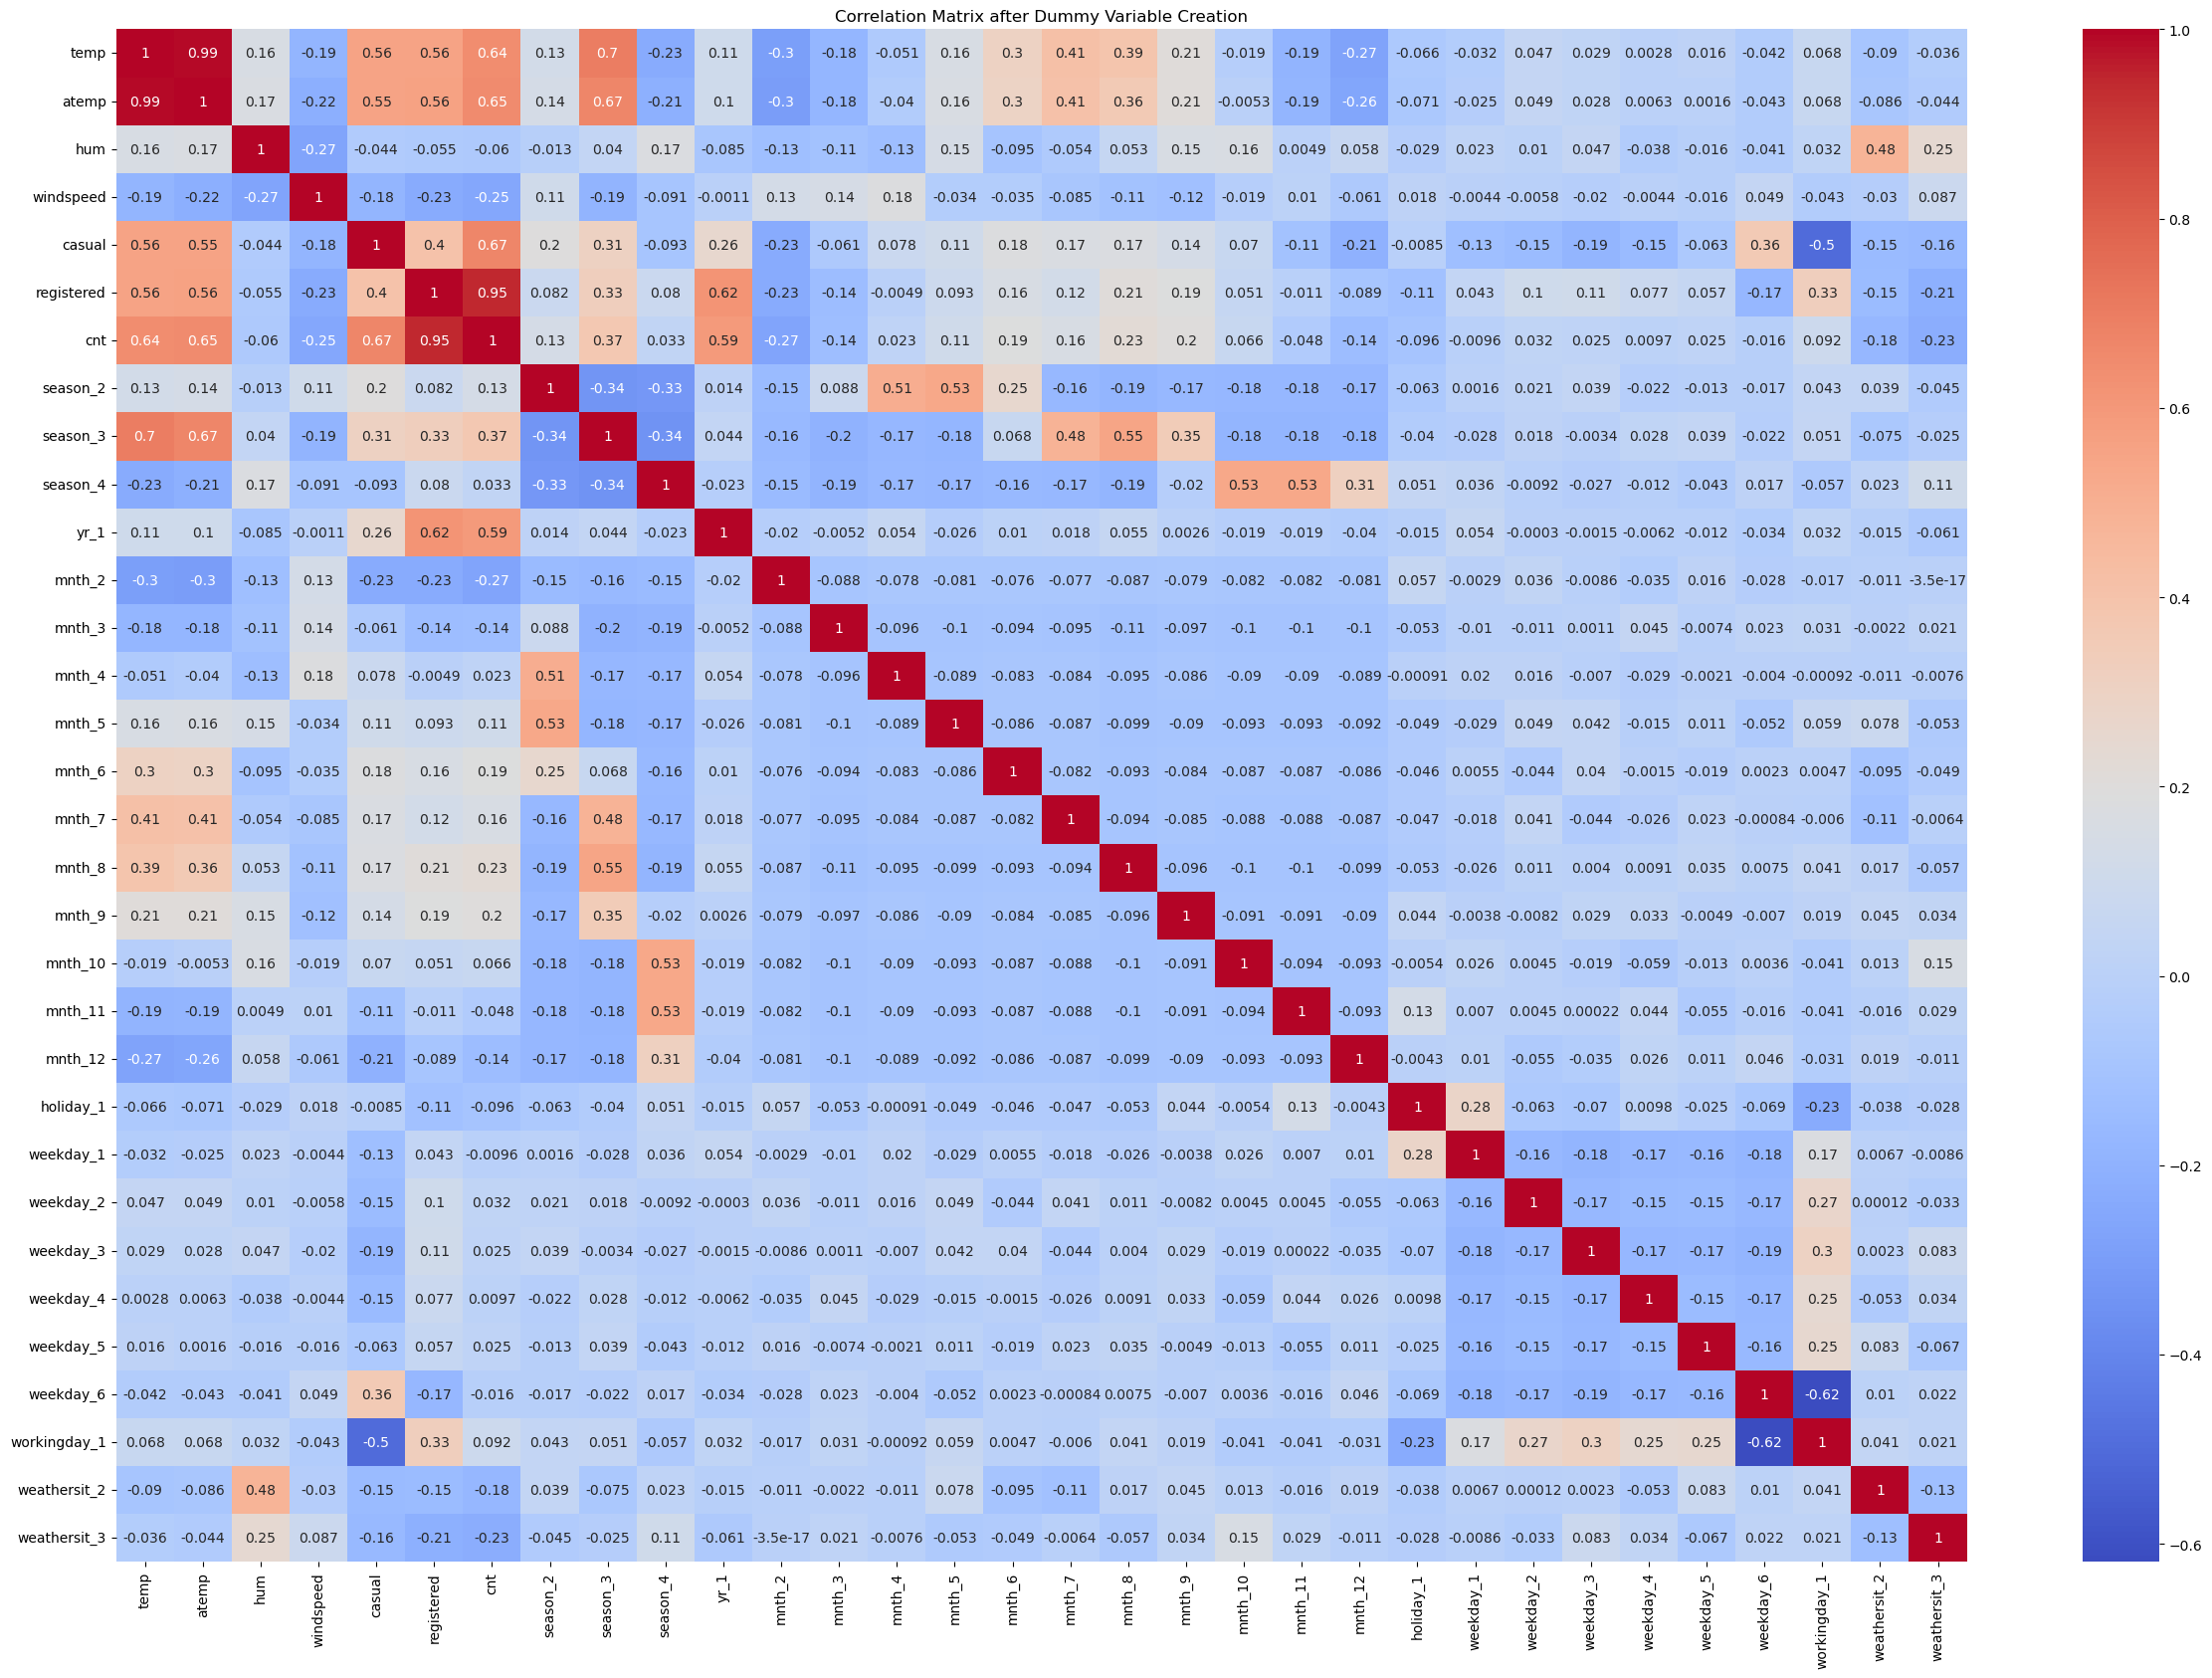

In [803]:
# Create a correlation heatmap which will help in feature selection while building the model
plt.figure(figsize=(30, 20))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix after Dummy Variable Creation')
plt.show()

In [804]:
# Generate X and y for train and test sets
X_train = df_train.drop(columns=[TARGET])
y_train = df_train[TARGET]

# Build the model
X_train_iter1_sm = sm.add_constant(X_train)
model_sm_iter1 = sm.OLS(y_train, X_train_iter1_sm).fit()


print(model_sm_iter1.summary())

# Checking VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.to_numpy(), i) for i in range(X_train.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.269e+29
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:37:34   Log-Likelihood:                 16865.
No. Observations:                 510   AIC:                        -3.367e+04
Df Residuals:                     479   BIC:                        -3.354e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.232e-16   3.89e-16      0.573   

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
28,workingday_1,inf
26,weekday_5,inf
25,weekday_4,inf
24,weekday_3,inf
23,weekday_2,inf
22,weekday_1,inf
21,holiday_1,inf
0,temp,457.25
1,atemp,384.53
5,registered,48.36


# Observation
- Many attributes have infinite VIF, i.e. all of the variance is already explained by one or other variable for these features, hence these should be dropped
- Many feature coefficients have very high P > |t|, which means the significance of these features is very less in prediction of dependent variable

In [805]:
# Drop feature with infinite VIF
columns_with_infinite_vif = vif_data[vif_data['VIF'] == np.inf]['Feature'].tolist()
print("Columns with infinite VIF:", columns_with_infinite_vif)

X_train_2 = X_train.drop(columns=columns_with_infinite_vif)

# Rebuild the model without these features
X_train_2_sm = sm.add_constant(X_train_2)
model_sm_iter2 = sm.OLS(y_train, X_train_2_sm).fit()

print(model_sm_iter2.summary())

# Checking VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_2.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_2.to_numpy(), i) for i in range(X_train_2.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data


Columns with infinite VIF: ['workingday_1', 'weekday_5', 'weekday_4', 'weekday_3', 'weekday_2', 'weekday_1', 'holiday_1']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.799e+30
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:37:34   Log-Likelihood:                 17469.
No. Observations:                 510   AIC:                        -3.489e+04
Df Residuals:                     485   BIC:                        -3.478e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------

,Feature,VIF
0,temp,448.72
1,atemp,378.53
5,registered,27.51
2,hum,19.52
7,season_3,15.49
8,season_4,11.71
16,mnth_8,11.05
15,mnth_7,9.57
6,season_2,9.07
17,mnth_9,7.55


In [806]:
# Remove features with very high VIF 
columns_to_drop_high_vif = ['temp', 'registered', 'hum', 'season_3']
X_train_3 = X_train_2.drop(columns=columns_to_drop_high_vif)

# Rebuild the model without these features
X_train_3_sm = sm.add_constant(X_train_3)
model_sm_iter3 = sm.OLS(y_train, X_train_3_sm).fit()
print(model_sm_iter3.summary())

# Checking VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_3.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_3.to_numpy(), i) for i in range(X_train_3.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     150.9
Date:                Thu, 06 Nov 2025   Prob (F-statistic):          1.75e-194
Time:                        21:37:35   Log-Likelihood:                 540.86
No. Observations:                 510   AIC:                            -1040.
Df Residuals:                     489   BIC:                            -950.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1333      0.018      7.237   

,Feature,VIF
0,atemp,29.46
4,season_4,8.00
3,season_2,6.26
2,casual,6.22
9,mnth_5,6.15
14,mnth_10,5.90
12,mnth_8,5.46
10,mnth_6,5.29
11,mnth_7,5.24
15,mnth_11,5.02


In [807]:
# The remaining columns to be dropped are decided with some hit and trials keeping heatmap and correlation matrix generated earlier in mind
# features (months) to be removed with season 3: ['mnth_3','mnth_4','mnth_6','mnth_7','mnth_10', 'mnth_11', 'mnth_12','weekday_6','mnth_5','season_4','weathersit_2','windspeed']
# with season_4: ['mnth_2','mnth_3','mnth_4','mnth_6','mnth_7','mnth_8','mnth_10', 'mnth_11', 'mnth_12', 'season_2','casual'] (observed some skewed residuals)


columns_to_drop_3 = ['mnth_2','mnth_3','mnth_4','mnth_6','mnth_7','mnth_8','mnth_12','mnth_5','season_4','weathersit_2','windspeed']
X_train_4 = X_train_3.drop(columns=columns_to_drop_3)
# Rebuild the model without these features
X_train_4_sm = sm.add_constant(X_train_4)
model_sm_iter4 = sm.OLS(y_train, X_train_4_sm).fit()
print(model_sm_iter4.summary())

#Check VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_4.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_4.to_numpy(), i) for i in range(X_train_4.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     237.3
Date:                Thu, 06 Nov 2025   Prob (F-statistic):          3.45e-174
Time:                        21:37:35   Log-Likelihood:                 462.40
No. Observations:                 510   AIC:                            -904.8
Df Residuals:                     500   BIC:                            -862.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0882      0.013      6.569   

,Feature,VIF
1,casual,5.28
0,atemp,4.73
3,yr_1,2.02
2,season_2,1.54
7,weekday_6,1.46
4,mnth_9,1.24
5,mnth_10,1.21
8,weathersit_3,1.12
6,mnth_11,1.09


# Residual Analysis

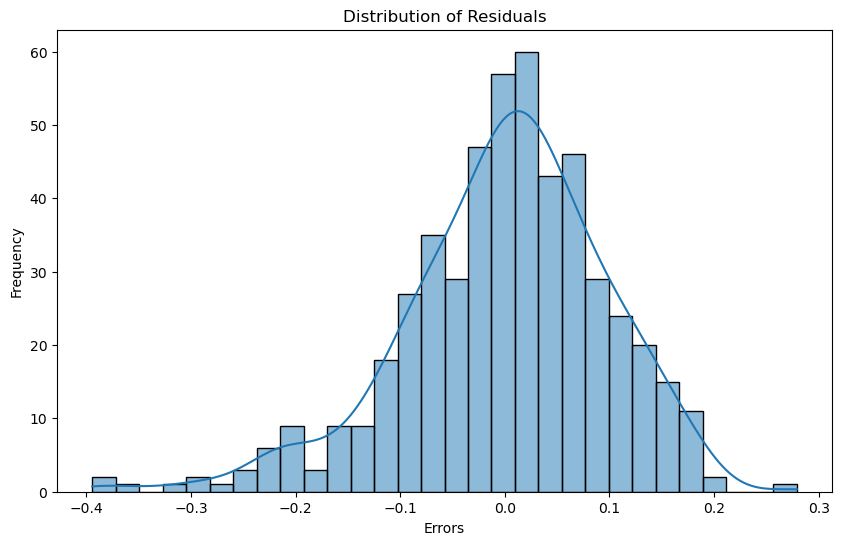

In [808]:
y_train_pred = model_sm_iter4.predict(X_train_4_sm)

# Plot the histogram of the error terms
residuals = y_train - y_train_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.show()


# Model Evaluations

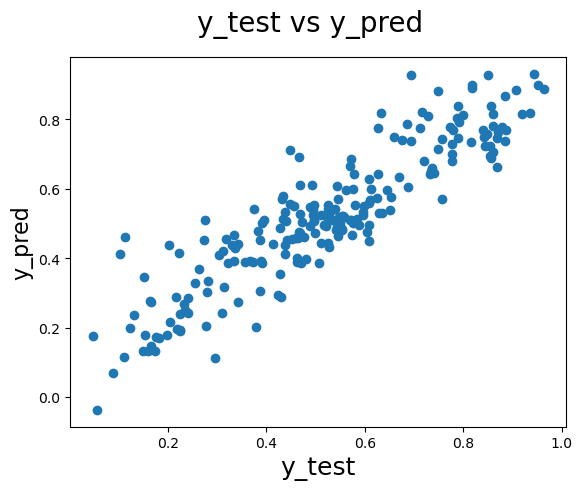

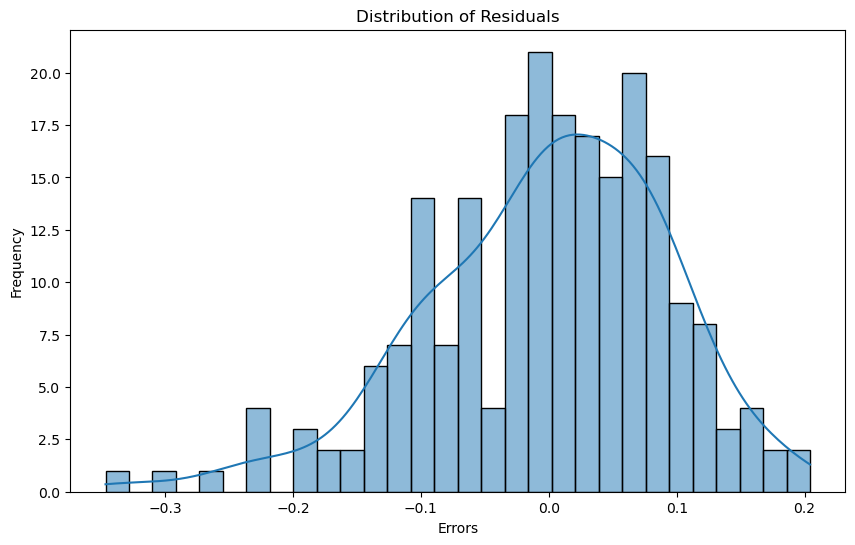

R2 Score: 0.8118623621509575


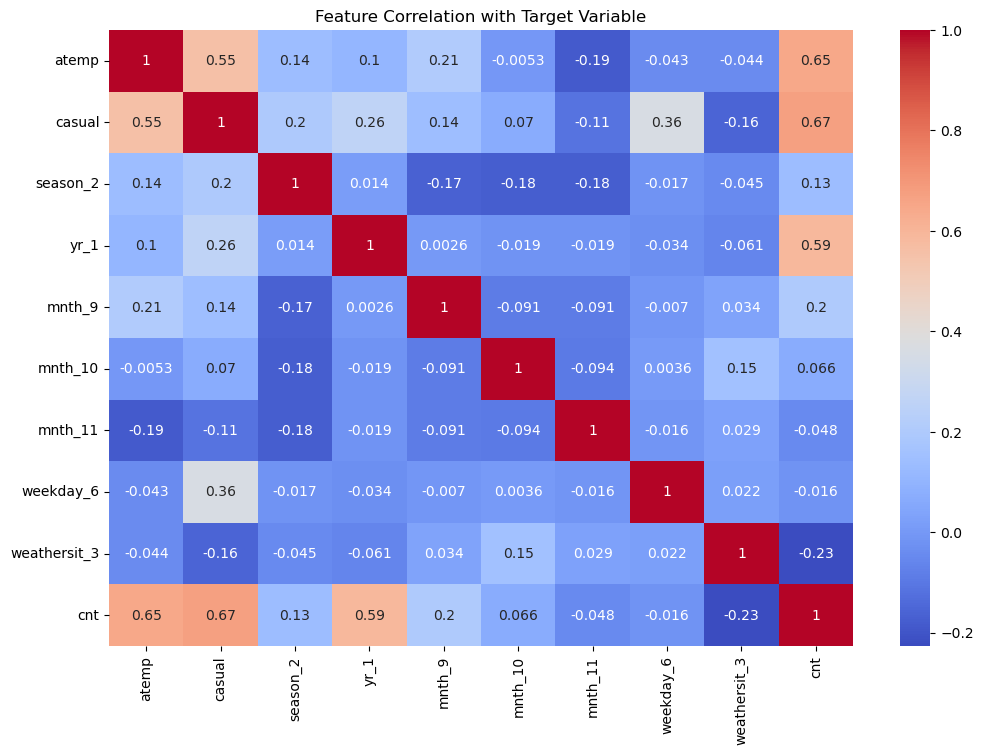

In [809]:
df_test[toScale] = scaler.transform(df_test[toScale])

X_test = df_test.drop(columns=[TARGET])
y_test = df_test[TARGET]


columns_dropped_final = columns_with_infinite_vif + columns_to_drop_high_vif + columns_to_drop_3

X_test_final = X_test.drop(columns=columns_dropped_final)
X_test_final_sm = sm.add_constant(X_test_final)

y_pred = model_sm_iter4.predict(X_test_final_sm)

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show() 

# Plot the histogram of the error terms
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.show()


print('R2 Score:', r2_score(y_test, y_pred))

df_ft = X_train_4.copy()
df_ft['cnt'] = y_train

plt.figure(figsize=(12, 8))
correlation = df_ft.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Target Variable')
plt.show()



  

# R2 score
0.8118

- The q-q plot having linear shape indicates that the residuals are also having normal distribution but different mean and deviation

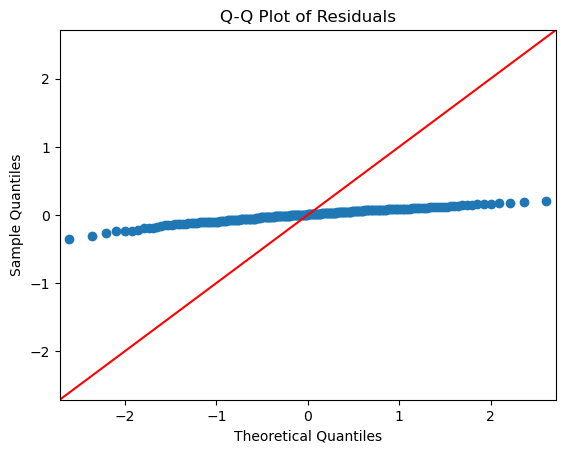

In [823]:

sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

- Linearity of points in q-q plot indicates that the residual distribution have similar shape as theoretical distribution and hence is normal distribution
- Not falling on theoretical line and intersecting it means that the mean and standard deviation of residuals is different than theoretical values